In [90]:
import pandas as pd
import numpy as np
import anndata
import matplotlib.pyplot as plt
import os
import re

# Purpose:

Aggragate sc data consistant with standard muscat package: https://bioconductor.org/packages/devel/bioc/vignettes/muscat/inst/doc/analysis.html#sec-agg

In [2]:
adata = anndata.read_h5ad('../../../../../pipeline42/datasets/TabulaSapiens/TS_Liver.h5ad')

In [5]:
cell_types = adata.obs['cell_ontology_class'].unique()

In [6]:
adata_ct = adata[adata.obs['cell_ontology_class'] == cell_types[0]]

In [70]:
# The sum of each gene, its as if we combined the cells to make up the bulk
bulk = np.array(adata_ct.X.sum(axis = 0))[0]

In [71]:
bulk

array([   0.      ,   63.15086 ,    0.      , ..., 6368.373   ,
         57.567596,  160.55916 ], dtype=float32)

In [18]:
norm_factor = np.sum(bulk)

In [32]:
normalized_bulk = np.log2(bulk+1/norm_factor+1)

Text(0.5, 0, 'Normalized UMI ')

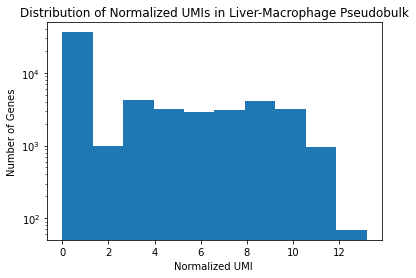

In [51]:
plt.hist(np.array(normalized_bulk)[0])
plt.yscale('log')
plt.title('Distribution of Normalized UMIs in Liver-Macrophage Pseudobulk')
plt.ylabel("Number of Genes")
plt.xlabel('Normalized UMI ')

In [102]:
adata.obs['organ_tissue'].unique()

['Liver']
Categories (1, object): ['Liver']

# Creating Pseudobulk systematically for one organism part

In [121]:
def create_index(organism_part:str, cell_types:list):
    """
    Create in index that is formated like "OrganismPart_CellType"
    """
    return [f'{organism_part}_{cell_type}' for cell_type in cell_types]
    

In [108]:
def create_sum_pseudobulk(adata, cell_type_column:str, organism_part_column:str):
    """
    Creates pseudobulk for one adata file by summation method
    pseudobulk UMIs are in log2+1 at the end

    cell_type_column is the column you want to aggragate by
    organism_part_column is the column name that contains your organism part. Used for naming indexes
    """

    cell_types = adata.obs[cell_type_column].unique()

    organism_part = adata.obs[organism_part_column].unique()[0]

    cell_type_aggragations = []

    for cell_type in cell_types:
        print(f'working on {cell_type}')

        adata_ct = adata[adata.obs[cell_type_column] == cell_type]

        bulk = np.array(adata_ct.X.sum(axis = 0))[0]

        norm_factor = np.sum(bulk)

        normalized_bulk = np.log2(bulk+1/norm_factor+1)
        
        cell_type_aggragations.append(normalized_bulk)

    pseudobulk_df = pd.DataFrame(cell_type_aggragations)

    pseudobulk_df.index = create_index(organism_part, cell_types)
    pseudobulk_df.columns = adata.var_names

    return pseudobulk_df

pseudobulk = create_sum_pseudobulk(adata, 'cell_ontology_class', 'organ_tissue')

working on macrophage
working on monocyte
working on endothelial cell of hepatic sinusoid
working on liver dendritic cell
working on nk cell
working on fibroblast
working on hepatocyte
working on intrahepatic cholangiocyte
working on t cell
working on neutrophil
working on plasma cell
working on erythrocyte
working on endothelial cell


pseudo = pd.read_csv('../data/pseudobulk/pseudobulk.csv')

In [109]:
pseudobulk

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
Liver_macrophage,1.719826e-07,6.003397e+00,1.719826e-07,3.459432e+00,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,3.459432e+00,...,12.591231,6.063419,2.647454,1.719826e-07,12.148330,10.374682,4.836903,12.636935,5.872031,7.335919
Liver_monocyte,2.748122e+00,1.059418e+00,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,...,11.419580,4.766905,3.715038,5.159479e-07,10.952981,9.109426,3.410342,11.472292,5.501816,6.017502
Liver_endothelial cell of hepatic sinusoid,5.159479e-07,3.355716e+00,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,5.159479e-07,4.954196e+00,...,10.717979,5.927563,6.954226,3.459432e+00,10.365309,8.873856,6.743945,10.853662,4.838041,7.934832
Liver_liver dendritic cell,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,6.879290e-06,...,7.155833,0.000007,0.000007,6.879290e-06,6.668587,4.662212,0.000007,7.247196,0.000007,2.850160
Liver_nk cell,8.599130e-07,1.784656e+00,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,4.392317e+00,...,10.038222,3.027523,3.876529,8.599130e-07,9.635143,8.392078,3.404287,10.149230,4.474693,5.344863
Liver_fibroblast,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,2.579737e-06,...,8.309881,2.900418,3.544825,2.579737e-06,7.900633,6.295369,3.884489,8.455140,2.029242,5.114290
Liver_hepatocyte,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,6.361605e+00,...,11.860579,8.982163,9.074534,3.459432e+00,11.450200,10.277163,10.557770,12.144813,5.235460,10.418319
Liver_intrahepatic cholangiocyte,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,3.783613e-06,...,6.532324,3.983592,5.302068,3.783613e-06,6.391982,4.467676,1.964694,7.114863,0.000004,5.108530
Liver_t cell,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,2.508131e+00,1.719825e-06,...,8.522924,3.993513,6.939522,1.719825e-06,8.267967,6.940782,3.710717,8.751202,0.000002,6.408168
Liver_neutrophil,4.643524e-06,4.643524e-06,4.643524e-06,1.760166e+00,4.643524e-06,4.643524e-06,4.643524e-06,4.643524e-06,4.643524e-06,4.392318e+00,...,8.168155,0.000005,2.488750,4.643524e-06,8.040027,7.548580,1.358787,8.109688,0.000005,4.139691


# Create Pseudobulk for all organism parts and all cell types

In [117]:
def create_compiled_pseudobulk(path:str, files:list, cell_type_column:str, organism_part_column:str):
    """
    Returns a data frame containing organism part - cell type aggragates.

    files is a list of h5ad files to be pseudobulked
    cell_type_column is the column of the adata that you want to aggragate by
    organism_part_column is the column name that contains your organism part. Used for naming indexes

    """
    OP_pseudobulk_compiled = []

    for file in files:
        print(f'Opening Large file at {path}/{file}')
        adata = anndata.read_h5ad(f'{path}/{file}')
        OP_pseudobulk = create_sum_pseudobulk(adata = adata,
                                                cell_type_column=cell_type_column,
                                                organism_part_column=organism_part_column)
        OP_pseudobulk_compiled.append(OP_pseudobulk)

    vertical_stack = pd.concat(OP_pseudobulk_compiled, axis = 0)
    return vertical_stack


path = "../../../../../pipeline42/datasets/TabulaSapiens"
files = os.listdir(path)
comp = re.compile('.*.h5ad')
files = list(filter(comp.match, files))


compiled_pseudobulk = create_compiled_pseudobulk(
                                                 path = path,
                                                 files = files,
                                                 cell_type_column='cell_ontology_class',
                                                 organism_part_column='organ_tissue')
        


Opening Large file at ../../../../../pipeline42/datasets/TabulaSapiens/TS_Tongue.h5ad
working on epithelial cell
working on basal cell
working on immune cell
working on fibroblast
working on vein endothelial cell
working on pericyte cell
working on endothelial cell of lymphatic vessel
working on endothelial cell of artery
working on capillary endothelial cell
working on tongue muscle cell
working on keratinocyte
working on schwann cell
Opening Large file at ../../../../../pipeline42/datasets/TabulaSapiens/TS_Muscle.h5ad
working on endothelial cell of vascular tree
working on capillary endothelial cell
working on endothelial cell of lymphatic vessel
working on mesenchymal stem cell
working on endothelial cell of artery
working on pericyte cell
working on cd4-positive, alpha-beta t cell
working on skeletal muscle satellite stem cell
working on macrophage
working on cd8-positive, alpha-beta t cell
working on t cell
working on smooth muscle cell
working on tendon cell
working on fast muscl

In [119]:
compiled_pseudobulk.round(5)

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
Tongue_epithelial cell,0.00000,2.59070,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,3.11356,...,11.97498,8.48602,0.00000,4.81830,11.93120,6.52146,6.74470,12.56298,9.90327,9.39840
Tongue_basal cell,1.75589,6.48451,0.00000,3.55448,0.00000,3.45943,3.45943,0.00000,3.45943,7.91408,...,14.64096,11.12014,9.86312,7.14491,14.17016,12.87562,9.96359,14.71032,12.62468,11.50396
Tongue_immune cell,3.45943,7.43205,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,12.84339,8.05335,9.09081,6.68775,12.33199,11.02861,8.65787,12.91107,8.38920,9.88703
Tongue_fibroblast,0.00000,2.18089,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.39210,3.45943,...,9.89851,5.55772,6.56680,5.89806,9.43071,7.91221,6.01448,9.97922,5.52766,6.80720
Tongue_vein endothelial cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,9.68337,6.08748,7.59787,5.50849,9.22013,7.60814,6.70080,9.81733,6.60040,6.44116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liver_t cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50813,0.00000,...,8.52292,3.99351,6.93952,0.00000,8.26797,6.94078,3.71072,8.75120,0.00000,6.40817
Liver_neutrophil,0.00000,0.00000,0.00000,1.76017,0.00000,0.00000,0.00000,0.00000,0.00000,4.39232,...,8.16816,0.00000,2.48875,0.00000,8.04003,7.54858,1.35879,8.10969,0.00000,4.13969
Liver_plasma cell,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,...,6.87463,2.05179,3.96837,0.00001,6.53924,5.17621,2.65019,6.98803,2.31062,3.84592
Liver_erythrocyte,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.70169,5.27448,5.21449,4.95420,6.55745,5.17614,5.07055,7.82797,5.42601,6.18340


In [120]:
compiled_pseudobulk.to_csv('../data/pseudobulk/sum_pseudobulk.csv')